<a href="https://colab.research.google.com/github/HarikrishnareddGali/HarikrishnareddGali/blob/main/datasciencetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**Name:** *Hari Krishna Reddy, Gali*

**Place:** *Halle(Saale)*

**Project Name:** *Text Classification of gnad10 dataset*

**Environment:** *Google Colab*

**Summary of the project:** *Text classification of Ten thousand German News Articles Dataset(gnad10) using bert-based-german-cased checkpoint.*


**Purpose of the project:** *Sogedes.AI technical test*

**Libraries Used:** *huggingface transformers library, sklearn, numpy, matplotlib, huggingface datasets*

**Frameworks:** *Pytorch*

**Source:**[huggingface tutorials](https://huggingface.co/docs/transformers/tasks/sequence_classification), [Datasets](https://huggingface.co/datasets/gnad10), [bert-base-german-cased](https://huggingface.co/bert-base-german-cased), [huggingface Evaluate](https://huggingface.co/docs/evaluate/index), [transformers](https://jalammar.github.io/illustrated-transformer/), [bert](https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/), [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

# **Setup environmet**

**Installing Required Libraries**

In [ ]:
!pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 2.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


**Created a huggingface account to use the gnad10 dataset and huggingface trainer**

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

**Checking the version of the transformers**

In [ ]:
import transformers

print(transformers.__version__)

4.26.0


# **Data**



**Loading gnad10 dataset**

**gnad10 dataset consists of 9 different classes**

**names=[
                            "Web",
                            "Panorama",
                            "International",
                            "Wirtschaft",
                            "Sport",
                            "Inland",
                            "Etat",
                            "Wissenschaft",
                            "Kultur",
                        ]**
[More information of the dataset can be found here.](https://huggingface.co/datasets/gnad10)

In [ ]:
from datasets import load_dataset, load_metric

gnad10 = load_dataset("gnad10")

Generating train split:   0%|          | 0/9245 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1028 [00:00<?, ? examples/s]

Dataset gnad10 downloaded and prepared to /root/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# **Split**



**We can see the loaded data is already split into train and test**

**Dataset consists of a text and label**

In [ ]:
gnad10

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9245
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1028
    })
})


**Split the train dataset to generate validation data set**

In [ ]:
gnad10_train_validation = gnad10['train'].train_test_split(train_size=0.8)
gnad10_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

In [ ]:
gnad10_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 1849
})

In [ ]:
gnad10_train_validation['validation'] = gnad10_train_validation.pop('test')
gnad10_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

**Successfully splited data into train,test and validation**

In [ ]:
gnad10.update(gnad10_train_validation)
gnad10

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1028
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

**Overview of gnad10**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

gnad10.set_format('pandas')
df = gnad10['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
573,"Traiskirchens Bürgermeister Andreas Babler fordert im Video-Interview, Innenministerin Johanna Mikl-Leitner die Kompetenzen zu entziehen. Wien/Traiskirchen – Innenministerin Johanna Mikl-Leitner (ÖVP) habe in der Asylfrage nichts als Chaos und me...",1
4146,Nicht verurteilter Mann genießt seit 1. Juli internationalen Schutz. Tallinn – Estland hat einem ehemaligen Häftling aus dem US-Gefangenenlager Guantánamo eine befristete Aufenthaltserlaubnis erteilt. Dem nicht verurteilten Mann sei am 1. Juli ...,2
5232,"Eine Firma, die Dreck vergoldet. Politiker, Journalisten und Anwohner, die daran glauben. Ein Gericht, das die Anklage auf die lange Bank schiebt: Einer der größten Giftmüllskandale Deutschlands ist weitgehend unbekannt. Die Buchstaben auf dem Sc...",1
783,Die Finanzmärkte halten einen Zinsschritt im nächsten Monat jedoch für wenig wahrscheinlich. Der Volltext dieses auf Agenturmeldungen basierenden Artikels steht aus rechtlichen Gründen nicht mehr zur Verfügung.,3
7140,Beim Entfernen des Pickerls hätten sich Betroffene schwer verletzen können. Wien – An einer Wiener Berufsschule sind am Montag unter einem Aufkleber der rechtsradikalen Identitären Bewegung Österreich vier Rasierklingen gefunden worden. Wer den A...,5
5080,"Finanzminister Michel Sapin nimmt die zweite Moody's Rückstufung nach 2012 ""zur Kenntnis"". Griechenland ist, zumindest wirtschaftspolitisch betrachtet, nicht das einzige Sorgenkind der Eurozone. Auch auf Frankreich richten sich wieder die Blicke ...",3
3529,"Dichterin Friederike Mayröcker über das Nichtsuchen und Nichtfinden, ihren Heiligen Geist der Erleuchtung und den Tod als Skandal. STANDARD: Ich habe Ihnen eine weiße Lilie mitgebracht. Sie lieben die Natur, Blumen, besonders Lilien. Mayröcker: ...",3
2695,"LSG-Geschäftsführer Medwenitsch: Novelle mit Festplattenabgabe dennoch ""grundsätzlich positiv"". Die Urheberrechtsgesetz-Novelle sorgt eine Woche nach Vorlage durch das Justizministerium weiter für Diskussionen. Während am Vormittag die Mobilfunke...",0
1729,"Obwohl Erwin Pröll von der ÖVP-Spitze noch gebeten werden will, als Bundespräsident zu kandidieren, ist um seine Nachfolge in Niederösterreich schon ein Machtkampf ausgebrochen. Ein Antreten von Irmgard Griss würde dem schwarzen Hofburg-Anwärter ...",5
1961,CID-947 hat ein Zehntel der Masse seiner Heimatgalaxie und kratzt damit an herkömmlichen astronomischen Theorien. Zürich – Sind die Theorien zu Bildung und Wachstum von Galaxien falsch? Oder galten in der Frühzeit des Universums andere Gesetze? S...,7


In [ ]:
gnad10.reset_format()

# **Preprocess Data**



**Use AutoTokenizer to tokenize data, it is a huggingface library**

**Use bert-base-german-cased as the data is in German**

**Create a preprocessing function to tokenize text and truncate sequences to be no longer than BERT’s maximum input length which is 512**

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-based-german-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

gnad10_encoded = gnad10.map(tokenize_function, batched=True, batch_size=None)
gnad10_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1028
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1849
    })
})

# **Evaluate**



**For the evaluation one can use huggingface [Evaluate Library](https://huggingface.co/docs/evaluate/index)**

**I used sklearn.metrics to create function for computing metrics**

In [ ]:
from sklearn.metrics import accuracy_score
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

# **Train the Model**



**Finally ready to train the model!**

**Load bert-base-german-cased with [AutoModelForSequenceClassification](/docs/transformers/v4.26.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) along with the number of expected labels**

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 9
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoi

# **Training Params**



**Using the huggingface [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer) and adding compute metrics function in the trainer.**

**In trainer we evaluate the validation dataset.**

In [ ]:
from transformers import Trainer, TrainingArguments
batch_size = 16
logging_steps = len(gnad10_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-gnad10"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=gnad10_encoded["train"],
                  eval_dataset=gnad10_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();
     

Epoch,Training Loss,Validation Loss,Accuracy
1,0.620000,0.428648,0.861547
2,0.249400,0.357992,0.889129


**Training Results**

In [ ]:
trainer.evaluate()

{'eval_loss': 0.3579924702644348,
 'eval_accuracy': 0.8891292590589508,
 'eval_runtime': 61.8355,
 'eval_samples_per_second': 29.902,
 'eval_steps_per_second': 1.876,
 'epoch': 2.0}

# **Evaluate Test dataset**

**Analysing the test dataset using obtained predictions**

**Deriving classification report to analyze accuracy and f1 score of each label**

**Use sklearn metrics to get accuracy,f1 and loss of testdata**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
prds = trainer.predict(gnad10_encoded['test'])
y_preds = prds.predictions.argmax(axis=-1)
y_true = prds.label_ids
target_names = ['web','Panorama','International','Wirtschaft','Sport','Inland','Etat','Wissenschaft','Kultur']
print(classification_report(y_true, y_preds, target_names=target_names))

acc=print("accuracy:",accuracy_score(y_true, y_preds))
f1=print("f1_score:",f1_score(y_true, y_preds, average='weighted'))

               precision    recall  f1-score   support

          web       0.94      0.95      0.95       168
     Panorama       0.81      0.88      0.84       168
International       0.88      0.87      0.87       151
   Wirtschaft       0.90      0.85      0.88       141
        Sport       0.99      0.97      0.98       120
       Inland       0.85      0.85      0.85       102
         Etat       0.92      0.82      0.87        67
 Wissenschaft       0.85      0.89      0.87        57
       Kultur       0.87      0.89      0.88        54

     accuracy                           0.89      1028
    macro avg       0.89      0.89      0.89      1028
 weighted avg       0.89      0.89      0.89      1028

accuracy: 0.8910505836575876
f1_score: 0.8912657809019775


**Generate confusion matrix to analyze and improve the test dataset**

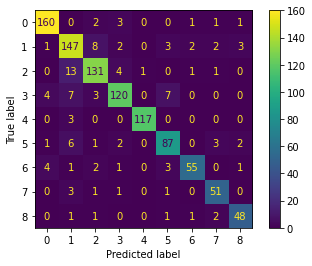

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
trainer.save_model()

# **Inference**

**Test model on a random news article**

In [ ]:
model_name

'bert-base-german-cased-finetuned-gnad10'

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('Im vergangenen Sommer hatte United mächtig um den zentralen Mittelfeldspieler gebuhlt. Mehrere Angebote lehnten die Spanier da noch ab. Das letzte Angebot der Engländer soll rund 70 Mio. Euro betragen haben.')

[{'label': 'LABEL_4', 'score': 0.9318645000457764}]